In [1]:
! pip install reportlab

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\jmverdoo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Time elapsed for running module "av": 0.160 sec.
Time elapsed for running module "N_VA_StaticAbsolute": 9.840 sec.
Time elapsed for running module "N_PDP": 927.094 sec.
Time elapsed for running module "N_VA_HeatMap": 2.166 sec.
Time elapsed for running module "N_VA_HClust": 0.507 sec.


C:\Users\jmverdoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\jmverdoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


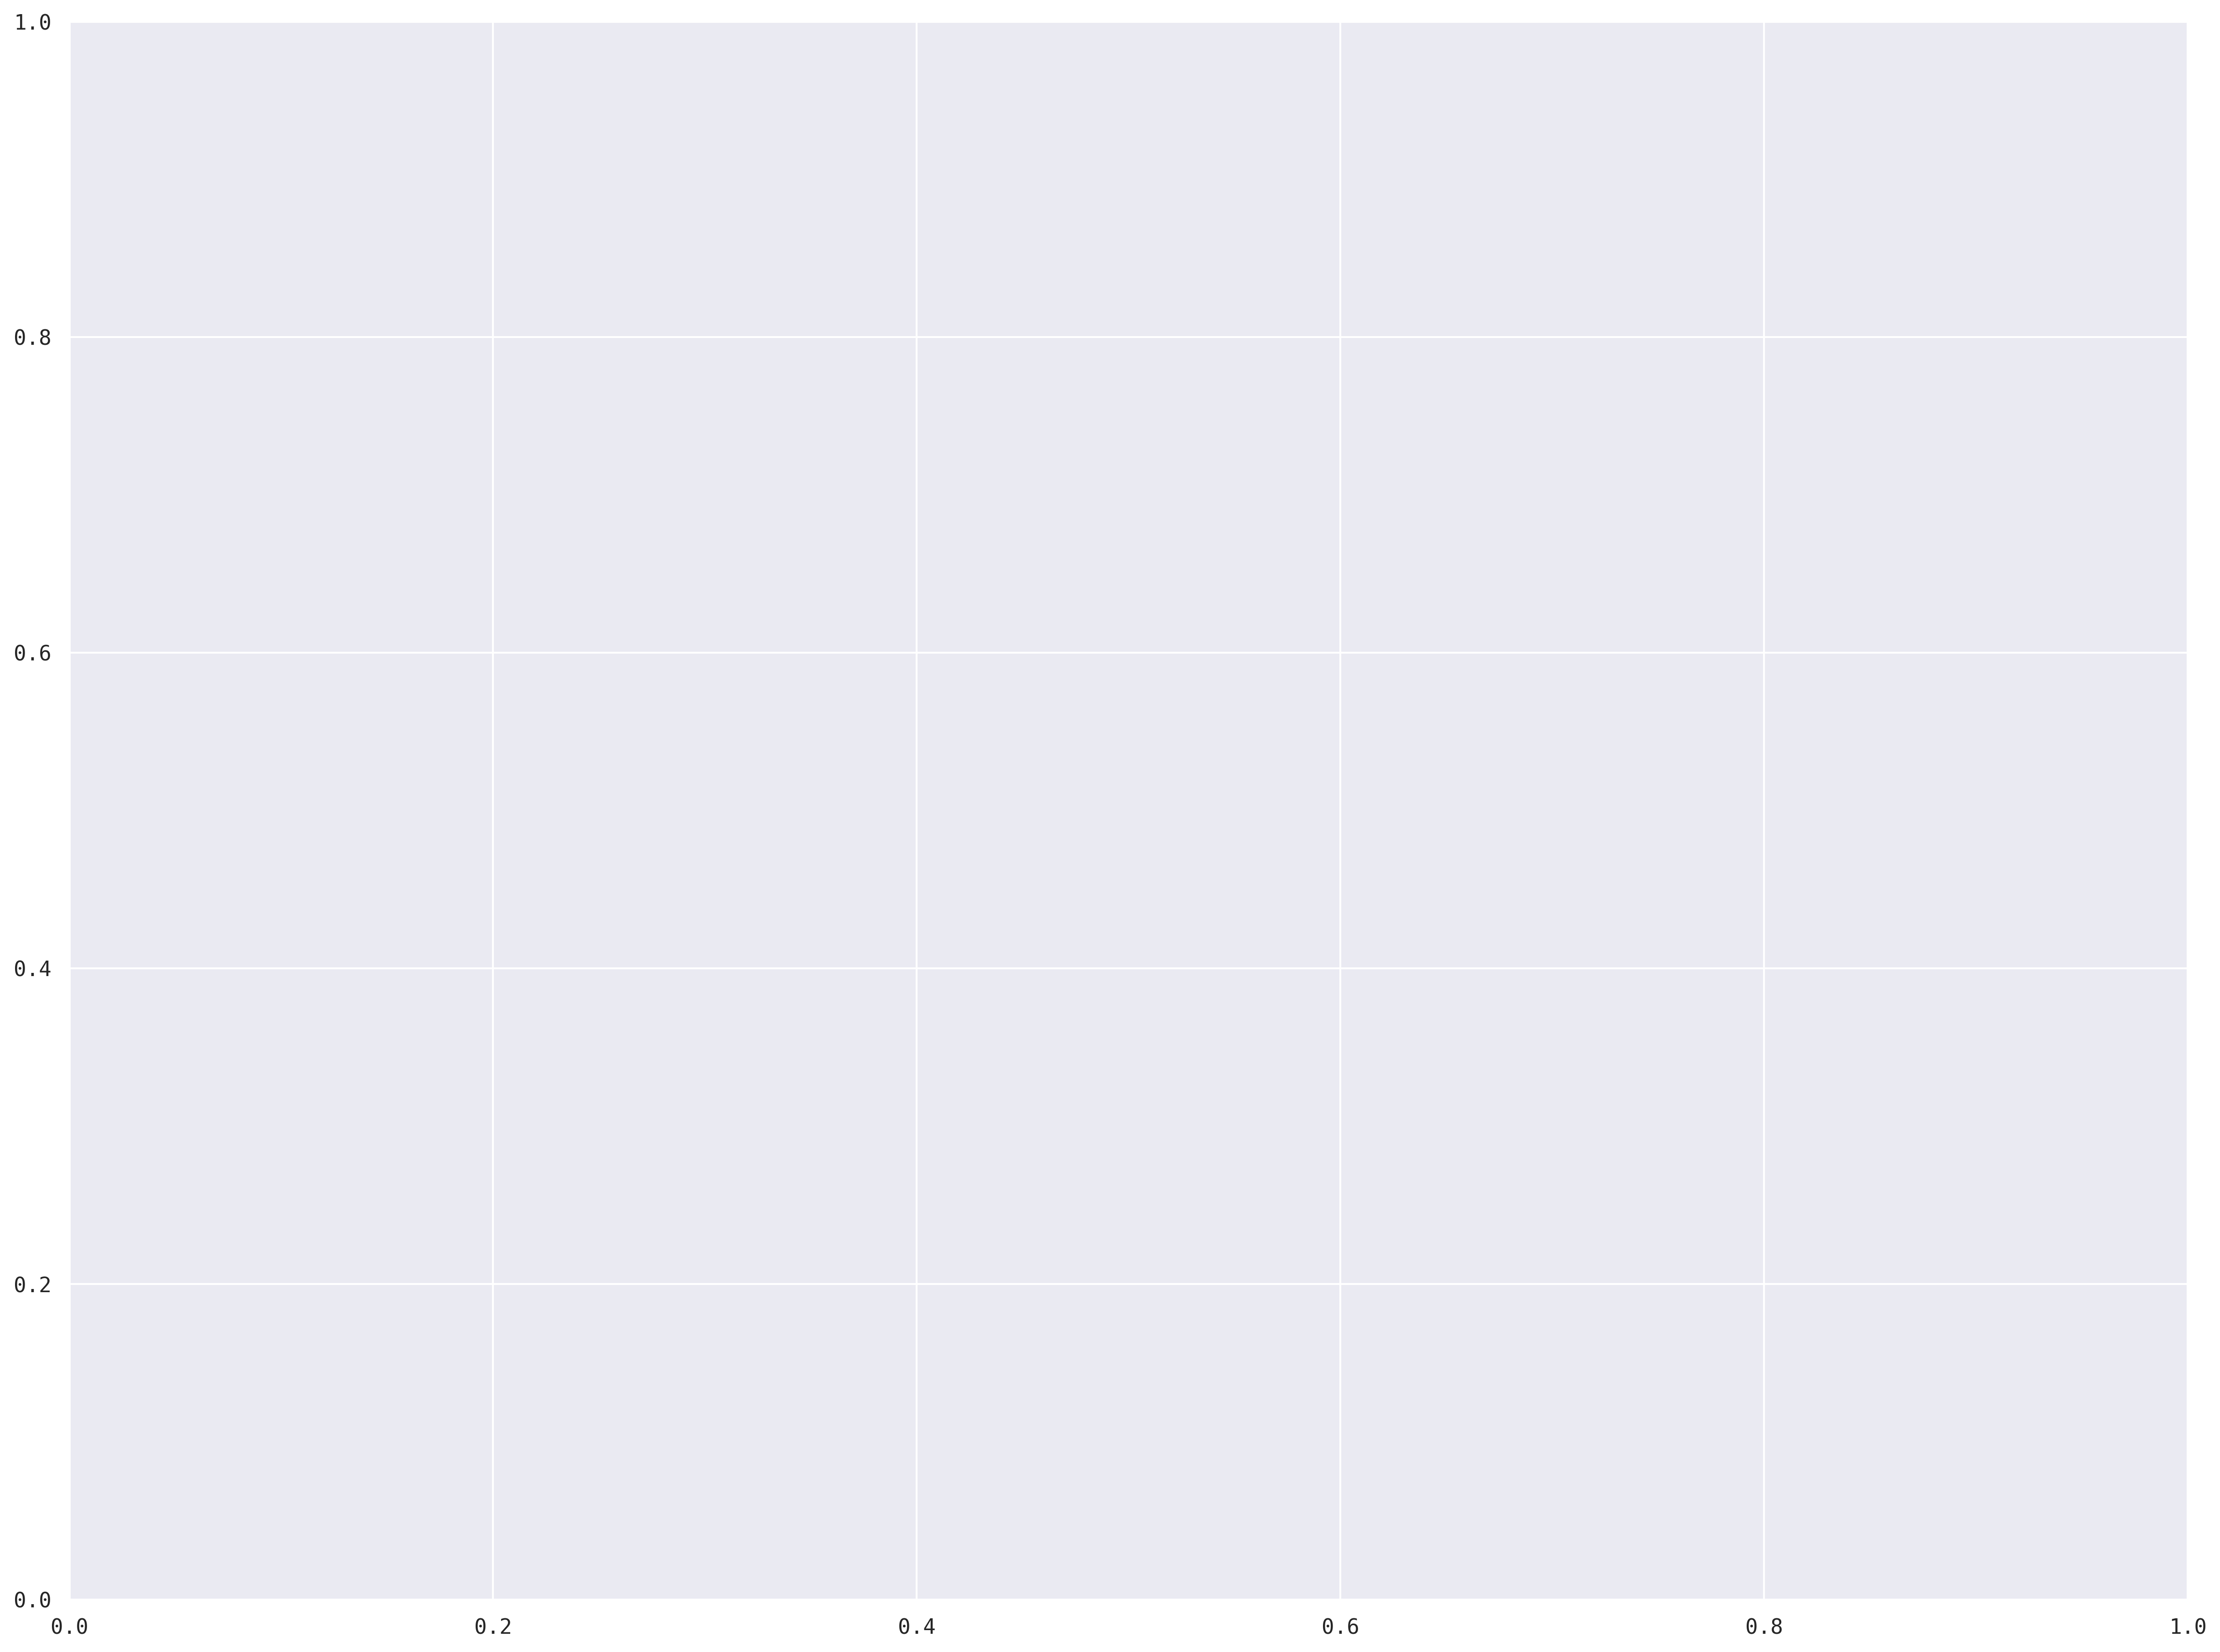

<Figure size 640x480 with 0 Axes>

<Figure size 1100x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

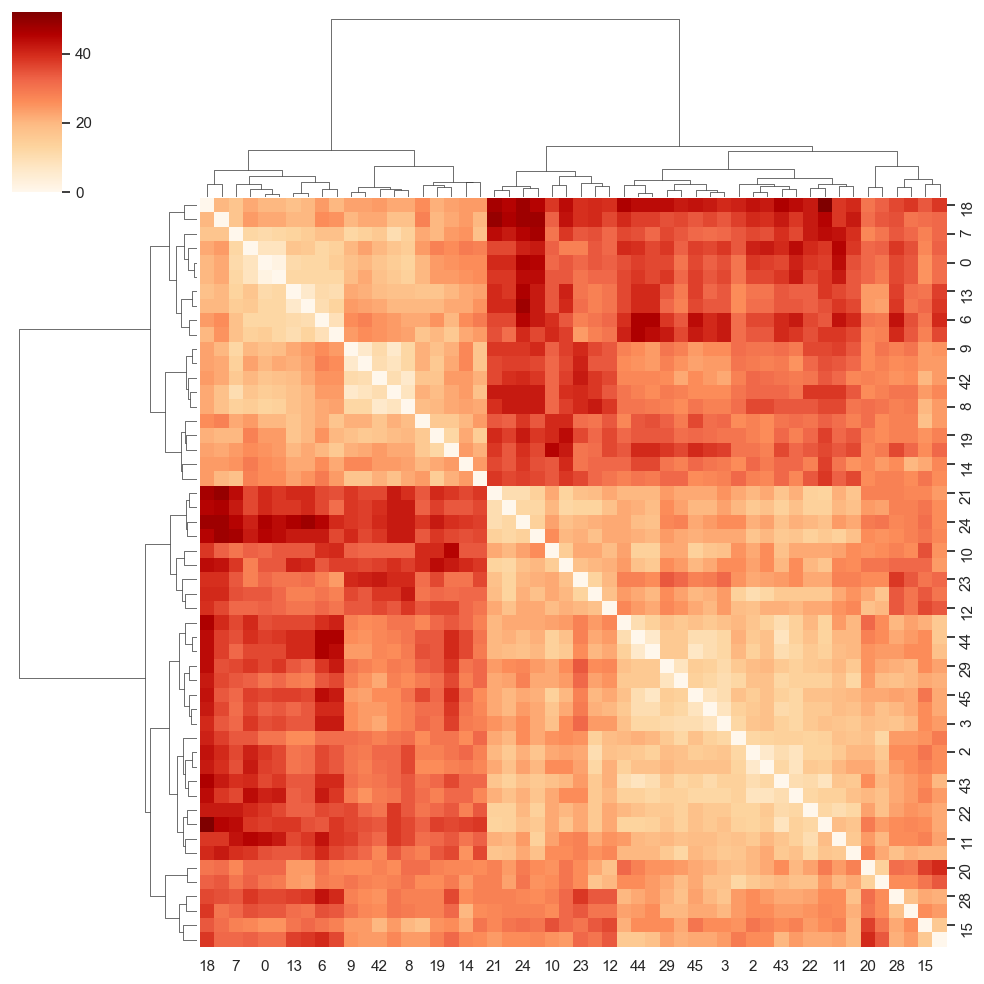

Time elapsed for running module "N_VA_ClusterMap": 1.334 sec.
Time elapsed for running module "N_VA_Mds": 0.807 sec.
Time elapsed for running module "N_VA_TSNE": 0.765 sec.
Time elapsed for running module "N_VA_TopK": 30.610 sec.
Time elapsed for running module "N_T_Report": 56.717 sec.
Time elapsed for running module "N_Moving_Objects": 1047.317 sec.


<Figure size 640x480 with 0 Axes>

<Figure size 1100x800 with 0 Axes>

<Figure size 1100x800 with 0 Axes>

In [1]:
#N_Moving_Objects uitvoeren en bugs fixen. Wat ik niet direct kan oplossen even afzetten en dat nadien dan oplossen
#N_VA_DynamicAbsolute is afgezet omdat het nog een fout gaf. Dit nog aanpassen.
#N_VA_ClusterMap is afgezet omdat het een fout gaf. Dit nog aanpassen.
#het printen van het aantal "arrays/interacties" afzetten, maar dit wel opslaan en in het Report tonen.

#met Rough en buffer spelen om daar een goed inzicht in te krijgen wat de afstanden precies bedoelen
#daarna naar drie stilstaande punten gaan.
#Rough verder uitwerken: werkt nog niet volledig en daarna moet het nog in rapport geplaatst worden ook
#!!!in de toekenning van de variabelen in report is er nog een probleem. Dit nog in orde brengen
#de variabelen voor de verschillende "fundamental" en "buffer" zijn nog niet perfect. Nog finetunen.
#de buffer berekeningen moeten in rapport komen

#make sure ti calculate normal and buffer with a push on the button so that they can be sompared wreach other
#create the same things in the document for fuzzy and/or buffer a nd then check. After that do with external point (center of the field); and then do with I object (ball) and with one time stamp; then do with another of external players...
#mak sure to always clearly show what isdone with a title.
#give each page a page number

import av  # Import all variables
import csv  # For reading and writing csv files
import importlib  # For reloading modules
import numpy as np  # For numerical calculations
import pandas as pd  # For data manipulation
import shutil  # For file handling
import time  # For timing the code
import matplotlib.pyplot as plt  # For plotting

t_start = time.time()

# Import modules for static and dynamic visualizations based on configuration settings
if av.N_VA_StaticAbsolute == 1:
    import N_VA_StaticAbsolute  # Creates the absolute (vectors wrt whole region) static visualizations
if av.N_VA_StaticRelative == 1:
    import N_VA_StaticRelative  # Creates the relative (vectors wrt to 'local maximum') static visualizations
if av.N_VA_StaticFinetuned == 1:
    import N_VA_StaticFinetuned  # Creates the finetuned static visualizations for a specific case that has to be finetuned here ; might be necessary to fintune some things in this code for the specific case
if av.N_VA_DynamicAbsolute == 1:
    import N_VA_DynamicAbsolute  # Creates dynamic visualizations. Not ok yet

# This function takes the original av_dataset and creates the working dataset from that
def SetDataForPDPType(data_filename, D_point_mapping, curr_point_id, window_length_tst):
    # Open the file as a dataframe with a header
    Df_dataset = pd.read_csv(data_filename, header=None)
    Df_dataset.columns = ['conID', 'tstID', 'poiID', 'x', 'y']
    # Open the file as a list
    L_dataset = []  # Create an empty list
    with open(data_filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for L_row in csv_reader:
            poi_id = L_row[0]
            try:
                int(poi_id)
            except ValueError:
                if poi_id not in D_point_mapping:
                    D_point_mapping[poi_id] = curr_point_id
                    curr_point_id += 1
                L_row[2] = D_point_mapping[poi_id]
            L_dataset.append(list(map(float, L_row)))
    # Transform list to array
    A_dataset = np.array(L_dataset, dtype=np.float32)
    # Save dataframe "Df_dataset"
    Df_dataset.to_csv("Df_dataset.csv", index=False)
    # Automatically detected variables
    # Detect the number of configurations in the dataset
    con = Df_dataset['conID'].max() + 1
    # Detect the number of time stamps in the dataset
    tst = Df_dataset['tstID'].max() + 1
    # Detect the number of points in the dataset
    poi = Df_dataset['poiID'].max() + 1
    # Checks
    if av.window_length_tst > tst:
        print("ERROR IN VALUE OF VARIABLE: window_length_tst > tst")
    return Df_dataset, A_dataset, con, tst, poi

if av.PDPg_fundamental == 1:
    av.PDPg_fundamental_active = 1
    shutil.copyfile(av.dataset_name, "N_C_PDPg_fundamental_Dataset.csv")
    av.dataset_name = 'N_C_PDPg_fundamental_Dataset.csv'
    av.dataset_name_exclusive = av.dataset_name [:-4]
    # Open the original file as a dataframe with a header in the current working directory
    av.Df_dataset = pd.read_csv("N_C_PDPg_fundamental_Dataset.csv", header=None)
    av.Df_dataset.columns = ['conID', 'tstID', 'poiID', 'x', 'y']
    # Open the file as a list in the current working directory
    av.L_dataset = []  # Create an empty list
    with open(av.dataset_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for L_row in csv_reader:
            poi_id = L_row[0]
            #try:
            int(poi_id)
            av.L_dataset.append(list(map(float, L_row)))
    # Transform list to array
    av.A_dataset = np.array(av.L_dataset, dtype=np.float32)
    # Save dataframe "Df_dataset"
    av.Df_dataset.to_csv("Df_dataset.csv", index=False)
    # Automatically detected variables
    # Detect the number of configurations in the dataset
    av.con = av.Df_dataset['conID'].max() + 1
    # Detect the number of time stamps in the dataset
    av.tst = av.Df_dataset['tstID'].max() + 1
    # Detect the number of points in the dataset
    av.poi = av.Df_dataset['poiID'].max() + 1

    if av.N_PDP == 1:
         import N_PDP  # Execute PDP
    if av.N_VA_HeatMap == 1:
         import N_VA_HeatMap  # Creates a heat map, based on the distance matrix
    if av.N_VA_HClust == 1:
        import N_VA_HClust  # Creates a hierarchical cluster tree, based on the distance matrix
    if av.N_VA_ClusterMap == 1:
        import N_VA_ClusterMap  # Creates a cluster map, based on the distance matrix
    if av.N_VA_Mds == 1:
        import N_VA_Mds  # Creates a dimension reduction, based on the distance matrix
    if av.N_VA_TSNE == 1:
        import N_VA_TSNE  # Creates a dimension reduction, based on the distance matrix
    if av.N_VA_Mds_autoencoder == 1:
        import N_VA_Mds_autoencoder # Creates a dimension reduction, using autoencoder
    if av.N_VA_TopK == 1:
        import N_VA_TopK  # Creates the topK visualisations
    if av.N_VA_Inverse == 1:
        import N_VA_Inverse  # Creates similar configurations
    if av.N_VA_Report == 1:
        import N_T_Report  # Create the report
    av.PDPg_fundamental_active = 0

if av.PDPg_buffer == 1:
    av.PDPg_buffer_active = 1
    import N_T_OB
    av.dataset_name = 'N_C_PDPg_buffer_Dataset.csv'  # Filename of csv file when buffer and fine borders
    av.dataset_name_exclusive = av.dataset_name [:-4] #The dataset without the last four characters ".csv"
    # Open the buffer file as a dataframe with a header in the current working directory
    av.Df_dataset = pd.read_csv("N_C_PDPg_buffer_Dataset.csv", header=None)
    av.Df_dataset.columns = ['conID', 'tstID', 'poiID', 'x', 'y']
    # Open the file as a list in the current working directory
    av.L_dataset = []  # Create an empty list
    with open(av.dataset_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for L_row in csv_reader:
            poi_id = L_row[0]
            int(float(poi_id))
            av.L_dataset.append(list(map(float, L_row)))
    # Transform list to array
    av.A_dataset = np.array(av.L_dataset, dtype=np.float32)
    # Save dataframe "Df_dataset"
    av.Df_dataset.to_csv("Df_dataset.csv", index=False)
    # Automatically detected variables
    # Detect the number of configurations in the dataset
    av.con = av.Df_dataset['conID'].max() + 1
    # Detect the number of time stamps in the dataset
    av.tst = av.Df_dataset['tstID'].max() + 1
    # Detect the number of points in the dataset
    av.poi = av.Df_dataset['poiID'].max() + 1

    if av.N_PDP == 1:
        importlib.reload(N_PDP)
    if av.N_VA_HeatMap == 1:
        importlib.reload(N_VA_HeatMap)
    if av.N_VA_HClust == 1:
        importlib.reload(N_VA_HClust)
    if av.N_VA_ClusterMap == 1:
        importlib.reload(N_VA_ClusterMap)
    if av.N_VA_Mds == 1:
        importlib.reload(N_VA_Mds)
    if av.N_VA_Mds == 1:
        importlib.reload(N_VA_TSNE)
    if av.N_VA_TopK == 1:
        importlib.reload(N_VA_TopK)
    if av.N_VA_Inverse == 1:
        importlib.reload(N_VA_Inverse)
    if av.N_VA_Report == 1:
        importlib.reload(N_T_Report)
    av.PDPg_buffer_active = 0

if av.PDPg_rough == 1:
    av.PDPg_rough_active = 1
    #import N_T_OR

    #shutil.copyfile(av.dataset_name, "N_C_PDPg_rough_Dataset.csv")

    av.dataset_name = 'N_C_Dataset.csv'  # Filename of csv file when no buffer and rough borders
    #av.dataset_name = 'N_C_PDPg_fundamental_Dataset.csv'  # Filename of csv file when no buffer and rough borders; this is just the original file because the roughness is taken into account when the inequality matrix values are calculated.
    av.dataset_name_exclusive = av.dataset_name [:-4] # The dataset without the last four characters ".csv"

    # Open the original file as a dataframe with a header in the current working directory
    av.Df_dataset = pd.read_csv("N_C_PDPg_fundamental_Dataset.csv", header=None)
    #av.Df_dataset = pd.read_csv("N_C_Dataset.csv", header=None)
    av.Df_dataset.columns = ['conID', 'tstID', 'poiID', 'x', 'y']
    # Open the file as a list in the current working directory
    av.L_dataset = []  # Create an empty list
    with open(av.dataset_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for L_row in csv_reader:
            poi_id = L_row[0]
            int(float(poi_id))
            av.L_dataset.append(list(map(float, L_row)))
    # Transform list to array
    av.A_dataset = np.array(av.L_dataset, dtype=np.float32)
    # Save dataframe "Df_dataset"
    av.Df_dataset.to_csv("Df_dataset.csv", index=False)
    # Automatically detected variables
    # Detect the number of configurations in the dataset
    av.con = av.Df_dataset['conID'].max() + 1
    # Detect the number of time stamps in the dataset
    av.tst = av.Df_dataset['tstID'].max() + 1
    # Detect the number of points in the dataset
    av.poi = av.Df_dataset['poiID'].max() + 1

    if av.N_PDP == 1:
        importlib.reload(N_PDP)
    if av.N_VA_HeatMap == 1:
        importlib.reload(N_VA_HeatMap)
    if av.N_VA_HClust == 1:
        importlib.reload(N_VA_HClust)
    if av.N_VA_ClusterMap == 1:
        importlib.reload(N_VA_ClusterMap)
    if av.N_VA_Mds == 1:
        importlib.reload(N_VA_Mds)
    if av.N_VA_TSNE == 1:
        importlib.reload(N_VA_TSNE)
    if av.N_VA_TopK == 1:
        importlib.reload(N_VA_TopK)
    if av.N_VA_Inverse == 1:
        importlib.reload(N_VA_Inverse)
    if av.N_VA_Report == 1:
        importlib.reload(N_T_Report)
    av.PDPg_rough_active = 0

if av.PDPg_bufferrough == 1:
    av.PDPg_bufferrough_active = 1
    #import N_T_OBR
    import N_T_OB
    av.dataset_name = 'N_C_PDPg_buffer_Dataset.csv'  # Filename of csv file when buffer
    av.dataset_name_exclusive = av.dataset_name [:-4] #The dataset without the last four characters ".csv"

    # Open the rough file as a dataframe with a header in the current working directory
    av.Df_dataset = pd.read_csv("N_C_PDPg_buffer_Dataset.csv", header=None)
    av.Df_dataset.columns = ['conID', 'tstID', 'poiID', 'x', 'y']
    # Open the file as a list in the current working directory
    av.L_dataset = []  # Create an empty list
    with open(av.dataset_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for L_row in csv_reader:
            poi_id = L_row[0]
            int(float(poi_id))
            av.L_dataset.append(list(map(float, L_row)))
    # Transform list to array
    av.A_dataset = np.array(av.L_dataset, dtype=np.float32)
    # Save dataframe "Df_dataset"
    av.Df_dataset.to_csv("Df_dataset.csv", index=False)
    # Automatically detected variables
    # Detect the number of configurations in the dataset
    av.con = av.Df_dataset['conID'].max() + 1
    # Detect the number of time stamps in the dataset
    av.tst = av.Df_dataset['tstID'].max() + 1
    # Detect the number of points in the dataset
    av.poi = av.Df_dataset['poiID'].max() + 1

    if av.N_PDP == 1:
        importlib.reload(N_PDP)
    if av.N_VA_HeatMap == 1:
        importlib.reload(N_VA_HeatMap)
    if av.N_VA_HClust == 1:
        importlib.reload(N_VA_HClust)
    if av.N_VA_ClusterMap == 1:
        importlib.reload(N_VA_ClusterMap)
    if av.N_VA_Mds == 1:
        importlib.reload(N_VA_Mds)
    if av.N_VA_TSNE == 1:
        importlib.reload(N_VA_TSNE)
    if av.N_VA_TopK == 1:
        importlib.reload(N_VA_TopK)
    if av.N_VA_Inverse == 1:
        importlib.reload(N_VA_Inverse)
    if av.N_VA_Report == 1:
        importlib.reload(N_T_Report)
    av.PDPg_bufferrough_active = 0

# End and print time
print('Time elapsed for running module "N_Moving_Objects": {:.3f} sec.'.format(time.time() - t_start))